# Link Google Colab
[Google Colab](https://colab.research.google.com/drive/1xr-6OUF_JxxTQug1Rb1eOawgga92d0UZ?usp=sharing)

# References
- [Google Colab Terbaru](https://colab.research.google.com/drive/1xr-6OUF_JxxTQug1Rb1eOawgga92d0UZ?usp=sharing)
- https://github.com/pycaret/pycaret/blob/master/tutorials/Tutorial%20-%20Regression.ipynb
- https://pycaret.readthedocs.io/en/stable/api/regression.html

# Install Libraries

In [ ]:
!pip install pycaret
!pip install shap
!pip install pycaret[analysis]

# Import Libraries

In [ ]:
import pycaret
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

# Data Understanding

## Load Data

In [ ]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Preparation

# Modeling

## Setup

In [ ]:
target_col = "charges"

In [ ]:
from pycaret.regression import *
s = setup(
    data,
    target = target_col,
    # remove_multicollinearity = True,
    # remove_outliers = True,
    # normalize = True,
    # pca = True,
    # fix_imbalance = True,
    # feature_selection = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [ ]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.regression.oop.RegressionExperiment

In [ ]:
# init setup on exp
exp.setup(
    data,
    target = target_col,
    # remove_multicollinearity = True,
    # remove_outliers = True,
    # normalize = True,
    # pca = True,
    # fix_imbalance = True,
    # feature_selection = True,
    session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


## Compare Model

In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.2650
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3810
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,1.4400
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.3170
ada,AdaBoost Regressor,4316.0568,29220505.6498,5398.4561,0.7903,0.6368,0.7394,0.1010
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.2490
br,Bayesian Ridge,4311.2349,38391950.0874,6176.8896,0.7306,0.5910,0.4447,0.0850
llar,Lasso Least Angle Regression,4303.7694,38386824.2786,6176.4846,0.7306,0.5952,0.4434,0.0880
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,1.4750
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0850


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Analyze Model

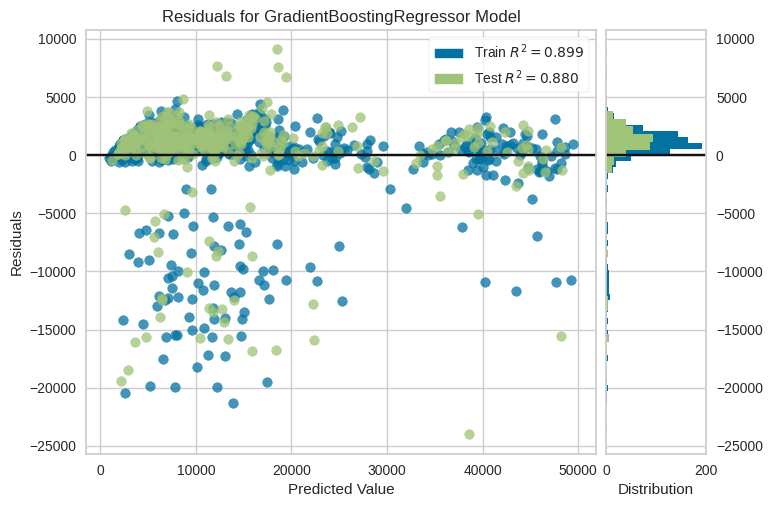

In [ ]:
plot_model(best, plot = 'residuals')

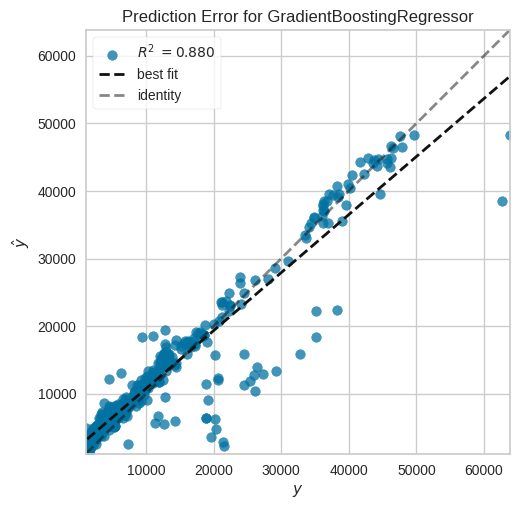

In [ ]:
plot_model(best, plot = 'error')

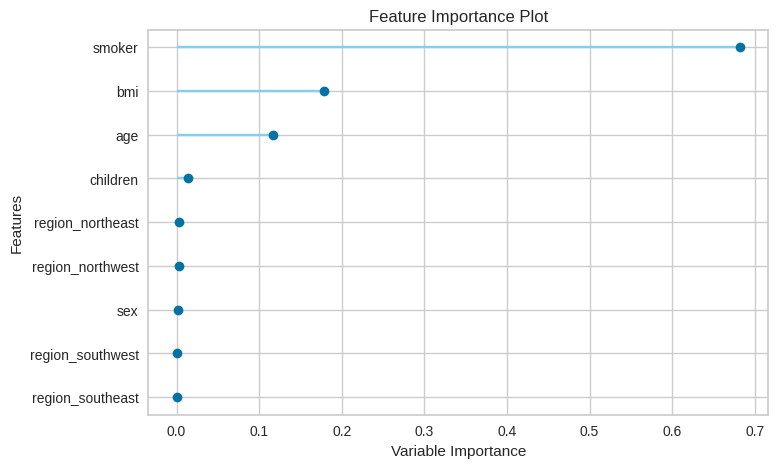

In [ ]:
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict

In [ ]:
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2392.5661,17148355.3169,4141.0573,0.8800,0.3928,0.2875


In [ ]:
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10681.513104
319,32,male,37.334999,1,no,northeast,4667.607422,8043.453463
314,27,female,31.400000,0,yes,southwest,34838.871094,36153.097686
150,35,male,24.129999,1,no,northwest,5125.215820,7435.516853
336,60,male,25.740000,0,no,southeast,12142.578125,14676.544334


## Save Model

In [ ]:
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [ ]:
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', GradientBoostingRegressor(random_state=123))])

# Ensemble Modeling

## Define Ensemble Model

In [ ]:
best_models_top = compare_models(sort = 'MAPE', n_select = 3)
best_models_top

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,3463.2216,48801106.4612,6963.9984,0.6544,0.4927,0.2212,0.1110
gbr,Gradient Boosting Regressor,2701.9927,23548981.3626,4832.9682,0.8320,0.4447,0.3137,0.1720
par,Passive Aggressive Regressor,4537.0122,67346309.9218,8142.7826,0.5422,0.5276,0.3207,0.0860
rf,Random Forest Regressor,2771.4583,25416502.3827,5028.6343,0.8172,0.4690,0.3303,0.3890
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.6590
lightgbm,Light Gradient Boosting Machine,2992.1828,25521038.3331,5042.0978,0.8149,0.5378,0.3751,0.4420
dt,Decision Tree Regressor,3383.4916,47823199.0729,6895.7016,0.6497,0.5602,0.4013,0.0860
xgboost,Extreme Gradient Boosting,3278.3216,31628234.0000,5599.0988,0.7709,0.5733,0.4208,0.1390
lr,Linear Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.0830
lar,Least Angle Regression,4303.5559,38388058.4578,6176.5920,0.7306,0.5949,0.4433,0.1010


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

[HuberRegressor(),
 GradientBoostingRegressor(random_state=123),
 PassiveAggressiveRegressor(random_state=123)]

In [ ]:
blender = blend_models(
    best_models_top,
    )

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2927.0593,29173299.4980,5401.2313,0.8258,0.3811,0.1716
1,3640.7260,41970648.4254,6478.4758,0.7560,0.4260,0.2148
2,2519.5606,24728677.3613,4972.7937,0.6869,0.4891,0.1901
3,3862.3514,23582082.4169,4856.1386,0.8031,0.5021,0.5420
4,3325.1301,37585595.7099,6130.7092,0.7205,0.4973,0.2011
5,3291.6639,28032604.1784,5294.5825,0.8197,0.3342,0.2300
6,3030.6072,32408646.0240,5692.8592,0.7795,0.3342,0.2043
7,3704.0590,37659108.2274,6136.7017,0.7929,0.4561,0.2121
8,2977.9155,30787140.1267,5548.6161,0.8011,0.3461,0.1855


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## Analyze Model

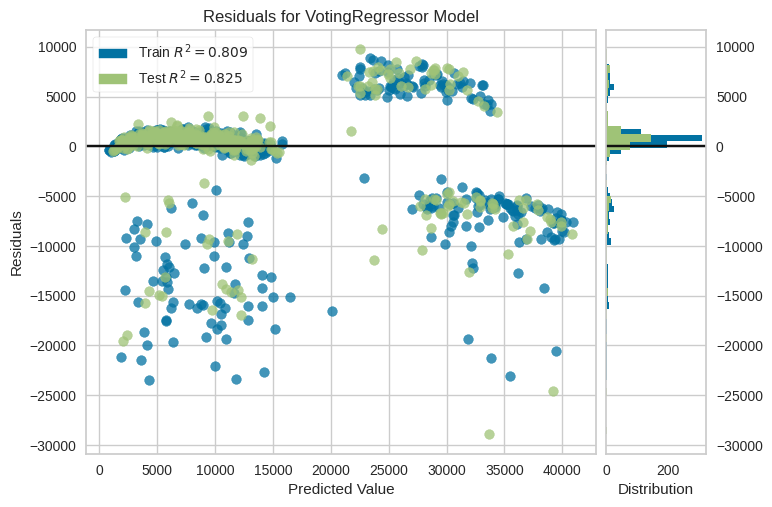

In [ ]:
plot_model(blender, plot = 'residuals')

In [ ]:
evaluate_model(blender)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Predict

In [ ]:
holdout_pred = predict_model(blender)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2923.1660,25059952.8116,5005.9917,0.8246,0.3517,0.2183


In [ ]:
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,10783.944119
319,32,male,37.334999,1,no,northeast,4667.607422,6685.925313
314,27,female,31.400000,0,yes,southwest,34838.871094,30056.898601
150,35,male,24.129999,1,no,northwest,5125.215820,6274.024554
336,60,male,25.740000,0,no,southeast,12142.578125,12453.839081


## Save Model

In [ ]:
save_model(blender, 'blended_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                  TransformerWrapper(include=['region'],
                                     transformer=OneHotEncoder(cols=['region'],
                                                               handle_missing='return_nan',
                                                               use_cat_names=True))),
                 ('trained_model',
                  VotingRegressor(estimators=[('Huber Regressor',
      

In [ ]:
loaded_best_pipeline = load_model('blended_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker...
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 VotingRegressor(estimators=[('Huber Regressor',
                                              HuberRegressor()),
                                             ('Gradient Boosting Regressor',
                                              GradientBoostingRegressor(random_state=123)),
                                             ('Passive Aggressive Regressor',
                                              PassiveAggressiveRegressor(random_state=123))],
                                 n_jobs=-1))])